In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import Data

In [50]:
oecd_bil = pd.read_csv('handson-ml2-master/datasets/lifesat/oecd_bli_2015.csv', thousands=',')
gdb_per_capita = pd.read_csv(
                                'handson-ml2-master/datasets/lifesat/gdp_per_capita.csv',
                                 encoding='latin1', delimiter='\t', thousands=',', na_values='n\a'
                            )

In [9]:
oecd_bil.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [10]:
oecd_bil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3292 non-null   object 
 1   Country                3292 non-null   object 
 2   INDICATOR              3292 non-null   object 
 3   Indicator              3292 non-null   object 
 4   MEASURE                3292 non-null   object 
 5   Measure                3292 non-null   object 
 6   INEQUALITY             3292 non-null   object 
 7   Inequality             3292 non-null   object 
 8   Unit Code              3292 non-null   object 
 9   Unit                   3292 non-null   object 
 10  PowerCode Code         3292 non-null   int64  
 11  PowerCode              3292 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  3292 non-null   float64
 15  Flag

In [11]:
oecd_bil.isna().sum()

LOCATION                    0
Country                     0
INDICATOR                   0
Indicator                   0
MEASURE                     0
Measure                     0
INEQUALITY                  0
Inequality                  0
Unit Code                   0
Unit                        0
PowerCode Code              0
PowerCode                   0
Reference Period Code    3292
Reference Period         3292
Value                       0
Flag Codes               2172
Flags                    2172
dtype: int64

In [24]:
gdb_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.383",2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.135",2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,100.315",2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","14,414.302",2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","2,088.344",2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,302.940",2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,350.151",2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,064.350",2012.0


In [27]:
gdb_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        190 non-null    object 
 1   Subject Descriptor             189 non-null    object 
 2   Units                          189 non-null    object 
 3   Scale                          189 non-null    object 
 4   Country/Series-specific Notes  188 non-null    object 
 5   2015                           187 non-null    float64
 6   Estimates Start After          188 non-null    float64
dtypes: float64(2), object(5)
memory usage: 10.5+ KB


# prepare the data

In [51]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    print(oecd_bli.head())
    print('#' * 100)
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    print(oecd_bli.head())
    print('#' * 100)
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    print(gdp_per_capita.head())
    print('#' * 100)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    print(full_country_stats.head())
    print('#' * 100)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    print(full_country_stats.head())
    print('#' * 100)
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [52]:
country_status = prepare_country_stats(oecd_bil, gdb_per_capita)

  LOCATION         Country INDICATOR                           Indicator  \
0      AUS       Australia   HO_BASE  Dwellings without basic facilities   
1      AUT         Austria   HO_BASE  Dwellings without basic facilities   
2      BEL         Belgium   HO_BASE  Dwellings without basic facilities   
3      CAN          Canada   HO_BASE  Dwellings without basic facilities   
4      CZE  Czech Republic   HO_BASE  Dwellings without basic facilities   

  MEASURE Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0       L   Value        TOT      Total        PC  Percentage               0   
1       L   Value        TOT      Total        PC  Percentage               0   
2       L   Value        TOT      Total        PC  Percentage               0   
3       L   Value        TOT      Total        PC  Percentage               0   
4       L   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Va

In [53]:
country_status

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [55]:
X = np.c_[country_status['GDP per capita']]
y = np.c_[country_status['Life satisfaction']]

In [58]:
X.shape, y.shape

((29, 1), (29, 1))

# Visualize the Data

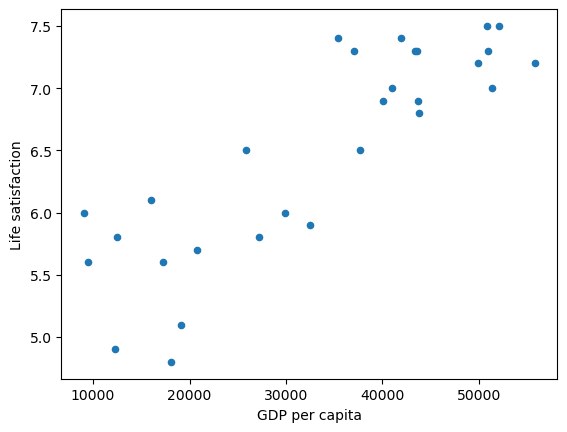

In [69]:
country_status.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

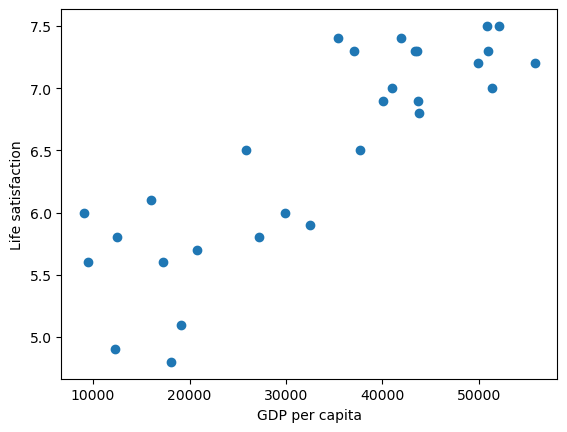

In [64]:
plt.scatter(data=country_status, x='GDP per capita', y='Life satisfaction')
plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.show()

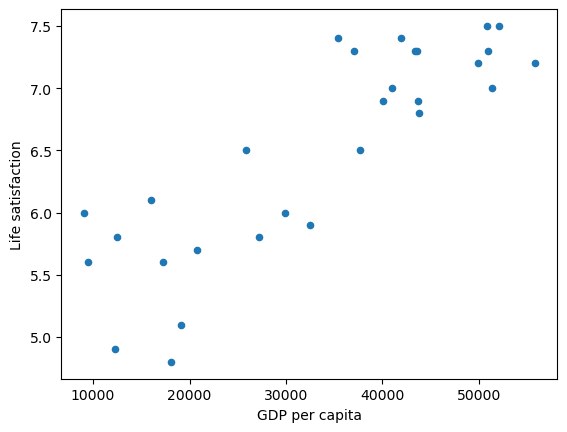

# Select a linear regression

In [65]:
model = LinearRegression()

In [66]:
model.fit(X, y)

LinearRegression()

In [67]:
print(model.predict([[22587]]))

[[5.96242338]]


In [ ]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]